<a href="https://colab.research.google.com/github/NGIN-haru/Prog2_11th/blob/main/work2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-7-4cd42e51bc0a>:17: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax2.stem(freqs,np.abs(X),use_line_collection=True)


<function matplotlib.pyplot.show(close=None, block=None)>

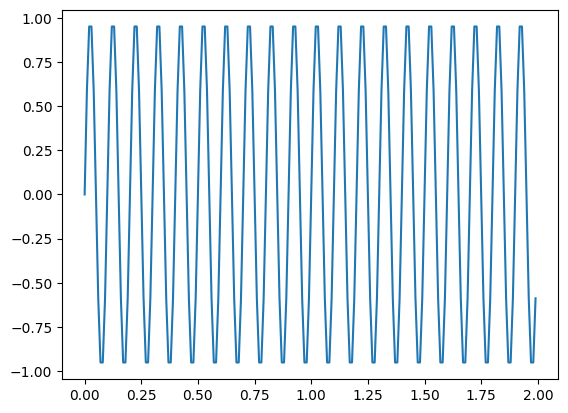

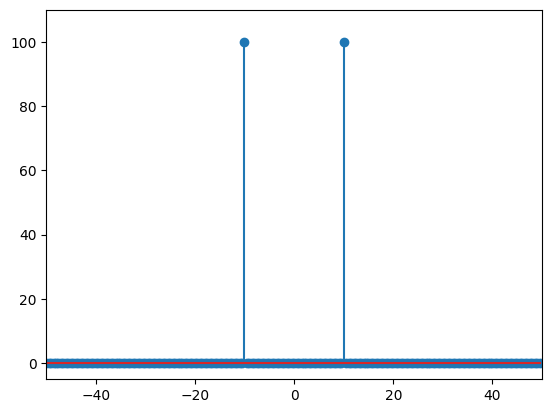

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

f=10
f_s = 100

t = np.linspace(0,2,2*f_s,endpoint = False)
x = np.sin(f*2*np.pi*t)

fig,ax= plt.subplots()
ax.plot(t,x)

X=np.fft.fft(x)
freqs = np.fft.fftfreq(len(x))*f_s

fig2,ax2=plt.subplots()
ax2.stem(freqs,np.abs(X),use_line_collection=True)
ax2.set_xlim(-f_s/2,f_s/2)
ax2.set_ylim(-5,110)

plt.show

ファイルをアップロードしてください
ファイル名を入力(拡張子は入力しない)loop101408
短時間フーリエ変換の結果


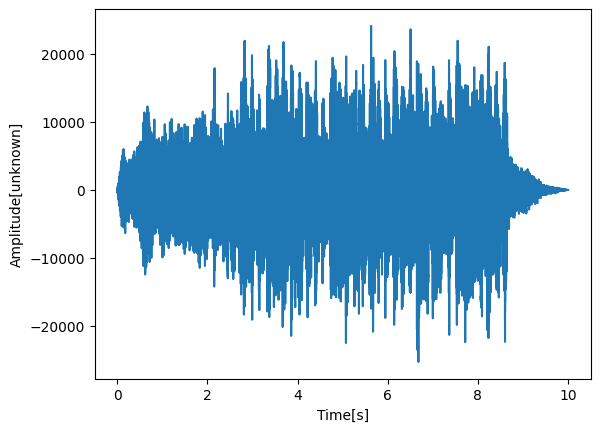

スペクトログラム


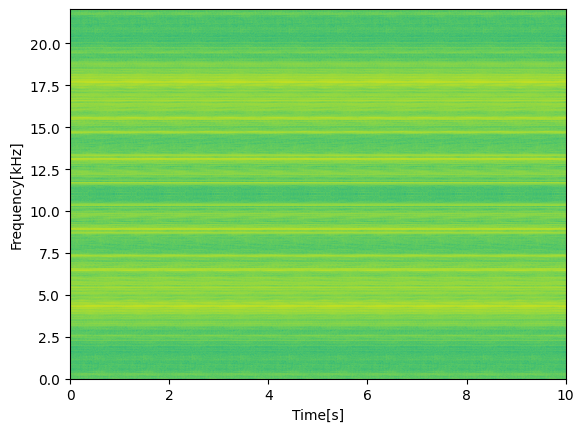

In [2]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
from skimage import util

print('ファイルをアップロードしてください')
name=input('ファイル名を入力(拡張子は入力しない)')
rate, audio = wavfile.read(name+'.wav',"r")
audio = np.mean(audio, axis=1)
N = audio.shape[0]
L = N/rate

f, ax = plt.subplots()
ax.plot(np.arange(N)/rate, audio)
ax.set_xlabel('Time[s]')
ax.set_ylabel('Amplitude[unknown]')
print('短時間フーリエ変換の結果')
plt.show()

M = 1024

slices = util.view_as_windows(audio, window_shape=(M,), step=100)

spectrum = np.fft.fft(slices, axis=0)[:N]
spectrum = np.abs(spectrum)

f, ax = plt.subplots()
S = np.abs(spectrum)
S = 20 * np.log10(S / np.max(S))

ax.imshow(S, origin='lower', cmap='viridis', extent=(0, L, 0, rate/2/1000))
ax.axis('tight')
ax.set_ylabel('Frequency[kHz]')
ax.set_xlabel('Time[s]')
print('スペクトログラム')
plt.show()